In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import numpy as np


In [ ]:
data =pd.read_csv("/content/inshort_news_data-1.csv (1).zip")

In [ ]:

df =pd. DataFrame(data)

In [ ]:
df

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science


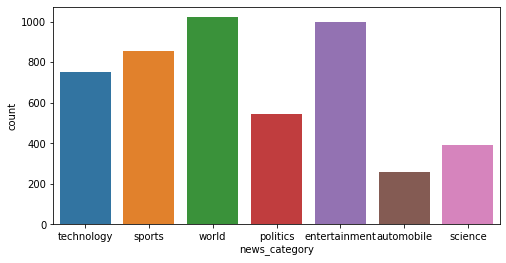

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x=data['news_category'],data=data)
plt.show()




sports,
politics,
entertainment,
world,
automobile
 and science.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,-1]=le.fit_transform(df.iloc[:,-1])

In [ ]:
df


,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,5
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,5
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",5
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,5
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,5
...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",3
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,3
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,3
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,3


In [ ]:
df.isnull().sum()

Unnamed: 0       0
news_headline    0
news_article     0
news_category    0
dtype: int64

In [ ]:
import re
from nltk.corpus import stopwords#some common words like are,is,an and the etc.
from nltk.stem.porter import PorterStemmer#root word can be find from a main words
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In below we are removing an stopwords and find root words to predict the type

In [ ]:
corpus = []
words = []
ps = PorterStemmer()
for i in range(0, len(df)):
    review = df.iloc[:,2][i]
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    for j in review:
        words.append(j)
    review = [ps.stem(word1) for word1 in review]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
df

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer#The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
y = df.iloc[:, -1].values

In [ ]:
review

'environ minist prakash javadekar said india histor respons climat chang take step reduc emiss said india g nation complianc pari agreement india alreadi achiev target reduc emiss intens gdp ad'

In [ ]:
ex=X[3]
ex2=X[30]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Support Vector Classifier

Accuracy of Support Vector Classifier is: 94.52282157676348%


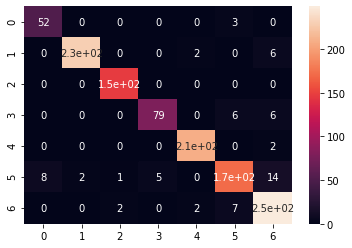

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print("Accuracy of Support Vector Classifier is: {}%".format(accuracy_score(y_test, y_pred_svc) * 100))
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True)
plt.show()

In [ ]:
art='The global smartphone sales in the third quarter of 2020 fell by 5.7% year-on-year to 36.6 crore units, according to Gartner. Overall global mobile phone sales to end users '

In [ ]:
print(art)
y_ex=svc.predict(ex)
print(y_ex)

The global smartphone sales in the third quarter of 2020 fell by 5.7% year-on-year to 36.6 crore units, according to Gartner. Overall global mobile phone sales to end users 
['technology']


In [ ]:
art1="for a long time. He's one of their main batsmen.He added, If his injury takes a long time, it would be good for our team."
print(art1)
y_ex2=svc.predict(ex2)
print(y_ex2)

for a long time. He's one of their main batsmen.He added, If his injury takes a long time, it would be good for our team.
['sports']


Decision Tree Classifier

Accuracy of Decision tree Classifier is: 92.36514522821577%


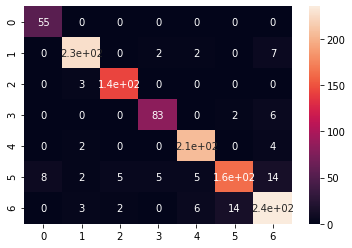

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy of Decision tree Classifier is: {}%".format(accuracy_score(y_test, y_pred_dt) * 100))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)
plt.show()

Random Forest Tree

Accuracy of Random Forest Classifier is: 93.85892116182572%


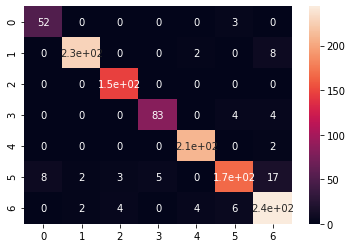

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy of Random Forest Classifier is: {}%".format(accuracy_score(y_test, y_pred_rf) * 100))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True)
plt.show()

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

87.21991701244814


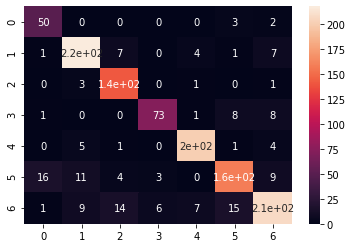

In [ ]:
y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn)*100)
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)
plt.show()

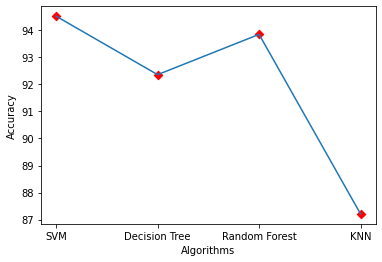

In [ ]:
x_axis=np.array(["SVM","Decision Tree","Random Forest","KNN"])
y_axis=np.array([94.52,92.36,93.85,87.21])
plt.scatter(x_axis,y_axis,color="red",marker="D")
plt.plot(x_axis,y_axis)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()